In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, ReLU, BatchNormalization
import numpy as np
import os
import sys
from six.moves import cPickle
import matplotlib.pyplot as plt

In [ ]:
# load data


batch_size = 32
num_classes = 21
epochs = 70
IMG_HEIGHT, IMG_WIDTH = 150, 150

PATH = '/content/drive/My Drive/Colab Notebooks/data'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
# 데이터 전처리(150x150)

train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=.2,
                                           height_shift_range=.2,
                                          horizontal_flip=True,
                                          zoom_range=.2)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 16824 images belonging to 21 classes.
Found 4189 images belonging to 21 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

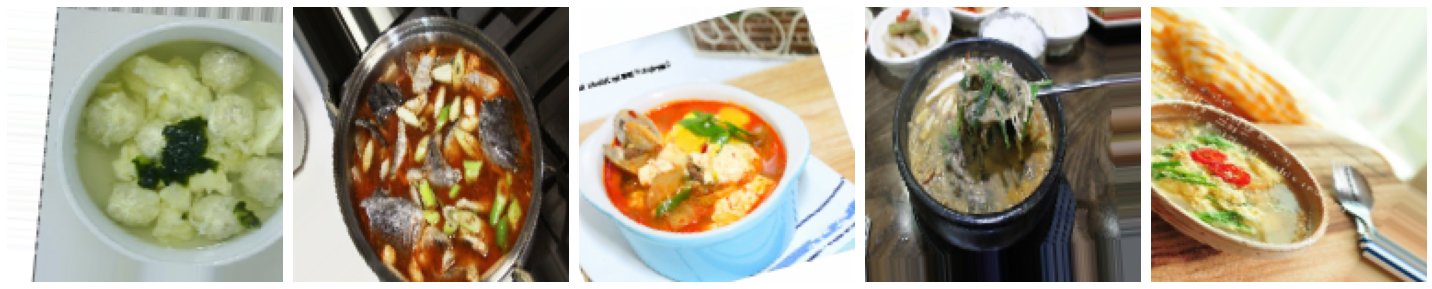

In [ ]:
# train data 확인

sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(21, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [ ]:
# compile
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
# 모델 생성

steps_per_epoch = int(16824/batch_size)

history = model.fit(
    train_data_gen,
    batch_size = batch_size,
    epochs = epochs,
    steps_per_epoch=steps_per_epoch,
    workers=4,
    validation_data=val_data_gen
)

Epoch 1/70
197/525 [==========>...................] - ETA: 16:11 - loss: 2.7396 - accuracy: 0.1299

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag)


411/525 [======================>.......] - ETA: 5:29 - loss: 2.6846 - accuracy: 0.1489

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


525/525 [==============================] - 2192s 4s/step - loss: 2.6563 - accuracy: 0.1593 - val_loss: 2.5591 - val_accuracy: 0.2232
Epoch 2/70
525/525 [==============================] - 189s 360ms/step - loss: 2.4716 - accuracy: 0.2184 - val_loss: 2.4124 - val_accuracy: 0.2566
Epoch 3/70
525/525 [==============================] - 184s 350ms/step - loss: 2.3728 - accuracy: 0.2411 - val_loss: 2.3128 - val_accuracy: 0.2974
Epoch 4/70
525/525 [==============================] - 185s 353ms/step - loss: 2.3031 - accuracy: 0.2633 - val_loss: 2.3052 - val_accuracy: 0.2750
Epoch 5/70
525/525 [==============================] - 184s 350ms/step - loss: 2.2347 - accuracy: 0.2854 - val_loss: 2.2099 - val_accuracy: 0.3089
Epoch 6/70
525/525 [==============================] - 183s 348ms/step - loss: 2.1801 - accuracy: 0.3035 - val_loss: 2.1231 - val_accuracy: 0.3361
Epoch 7/70
525/525 [==============================] - 181s 345ms/step - loss: 2.1289 - accuracy: 0.3185 - val_loss: 2.0621 - val_accuracy

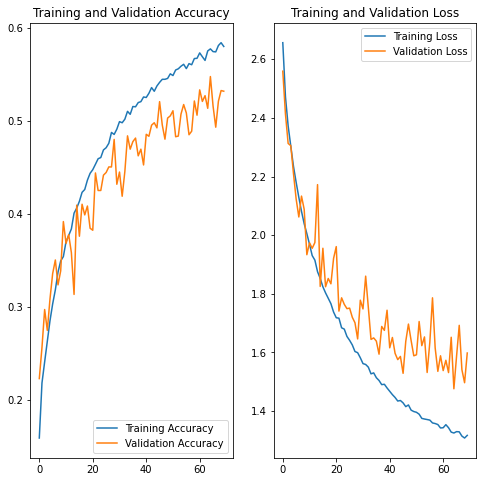

In [ ]:
# accuracy와 loss 그래프

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()